# Support Vector Machines Clasification

 SVM offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. It is used in a variety of applications such as face detection, classification of emails, classification of genes, and handwriting recognition.

The technique of SVM is simple, it just separates data points using a hyperplane with the usage of margin.  SVM finds an optimal hyperplane which helps in classifying new data points.

The idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

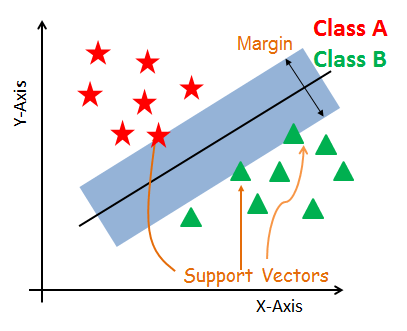

A hyperplane is a decision plane which separates between a set of objects having different class memberships.

A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

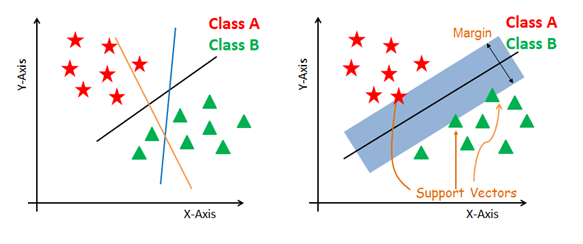

![image.png](https://machinelearningjourney.com/wp-content/uploads/2020/01/Linear3D.gif)

We can’t use linear hyperplane everytime, what if we have to deal with non-linear and inseparable planes as shown in the figure below.

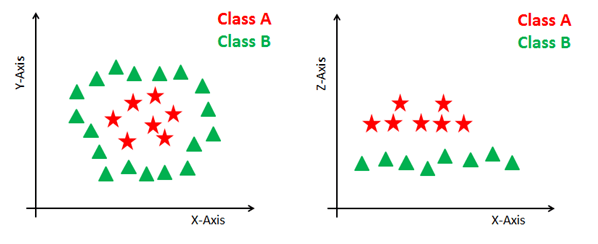

In such situation, SVM uses a kernel trick to transform the input space to a higher dimensional space as shown on the right. The data points are plotted on the x-axis and z-axis (Z is the squared sum of both x and y: z=x^2=y^2). 

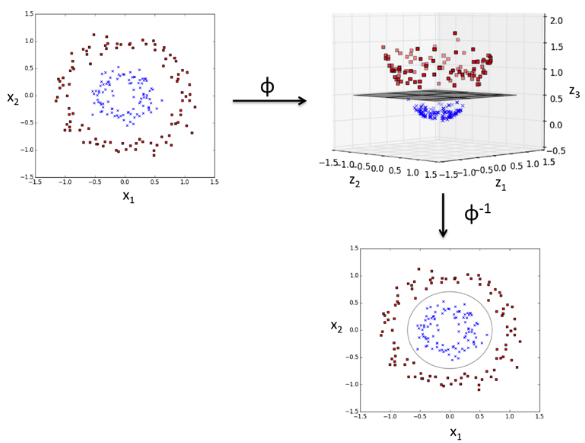

Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. It converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem.

![ChessUrl](https://images.squarespace-cdn.com/content/v1/51af568be4b0b9ab836e2474/1444337191389-5TTD0VOCK8R2QSHTRGJ2/boundary.gif "RBF")

1. Linear Kernel

A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.

                                            K(x, xi) = sum(x * xi)

2. Polynomial Kernel

A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space.

                                           K(x,xi) = 1 + sum(x * xi)^d

Where d is the degree of the polynomial. d=1 is similar to the linear transformation. The degree needs to be manually specified in the learning algorithm.

3. Radial Basis Function Kernel

The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space.

                                           K(x,xi) = exp(-gamma * sum((x – xi^2))
                                           
Here gamma is a parameter, which ranges from 0 to 1. A higher value of gamma will perfectly fit the training dataset, which causes over-fitting. Gamma=0.1 is considered to be a good default value. The value of gamma needs to be manually specified in the learning algorithm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

In [3]:
# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [4]:
# print the cancer data features (top 5 records)
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [5]:
# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [6]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=42)

In [10]:
def evaluate(model, X_test, y_test):
    
    y_prob_test = model.predict_proba(X_test)[:,1]

    roc_prob_test = roc_auc_score(y_test, y_prob_test)
    
    gini_prob_test = roc_prob_test*2-1
    
    
    
    y_prob_train=model.predict_proba(X_train)[:,1]
    
    roc_prob_train=roc_auc_score(y_train,y_prob_train)
    
    gini_prob_train = roc_prob_train*2-1

    print('Gini for test is', gini_prob_test*100)
    print('Gini for train is', gini_prob_train*100)

In [11]:
#Import svm model
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score

#By default, probability is not enabled. You can enable probability by using probability=True
base_model = svm.SVC(probability=True)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Gini for test is 98.61845972957086
Gini for train is 93.31015336513839


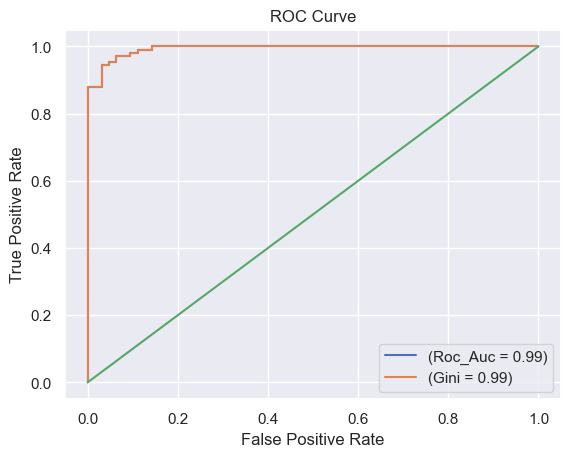

In [14]:
from sklearn.metrics import roc_curve

y_prob_test = base_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

# Auto dataset for classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


auto=pd.read_excel(r'car_data1.xlsx')

In [2]:
auto

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
auto.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [4]:
auto.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [5]:
for i in auto.columns:
    print(auto[i].unique(),"\t",auto[i].nunique())

['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


In [6]:
# We want to know in which way unique categories are distributed between the columns

for i in auto.columns:
    print(auto[i].value_counts())
    print()

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64

vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64

2        432
3        432
4        432
5more    432
Name: doors, dtype: int64

2       576
4       576
more    576
Name: persons, dtype: int64

small    576
med      576
big      576
Name: lug_boot, dtype: int64

low     576
med     576
high    576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



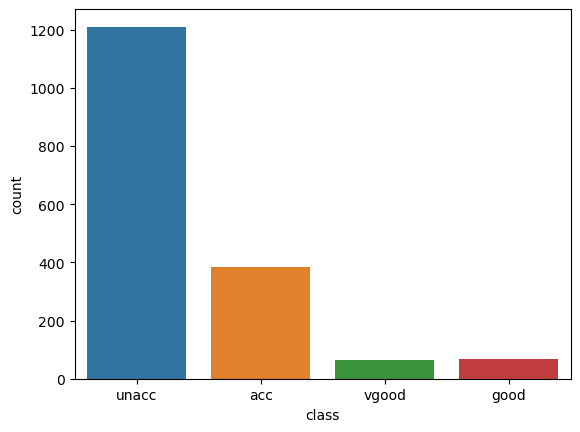

In [7]:
# We check class because it is not distributed equally

sns.countplot(data=auto, x='class')
plt.show()

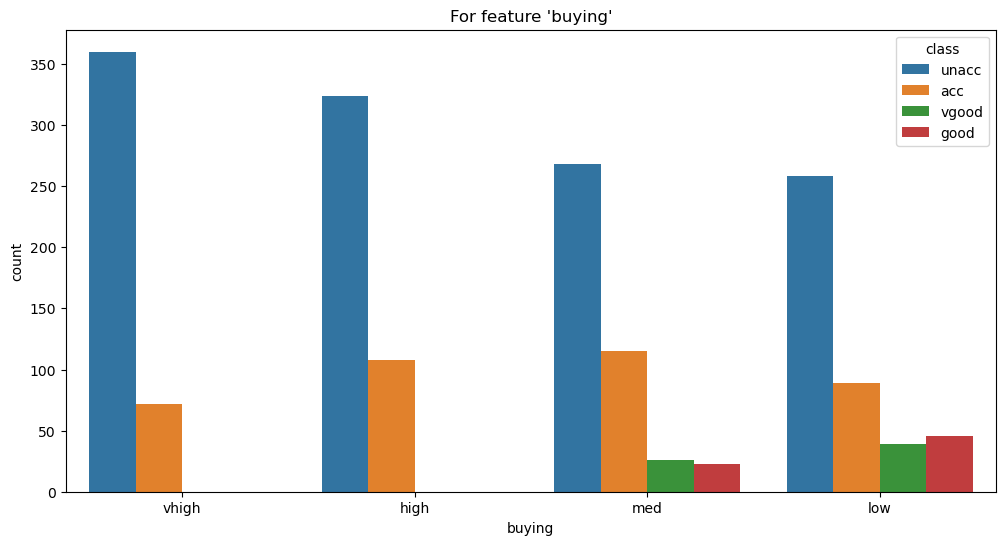

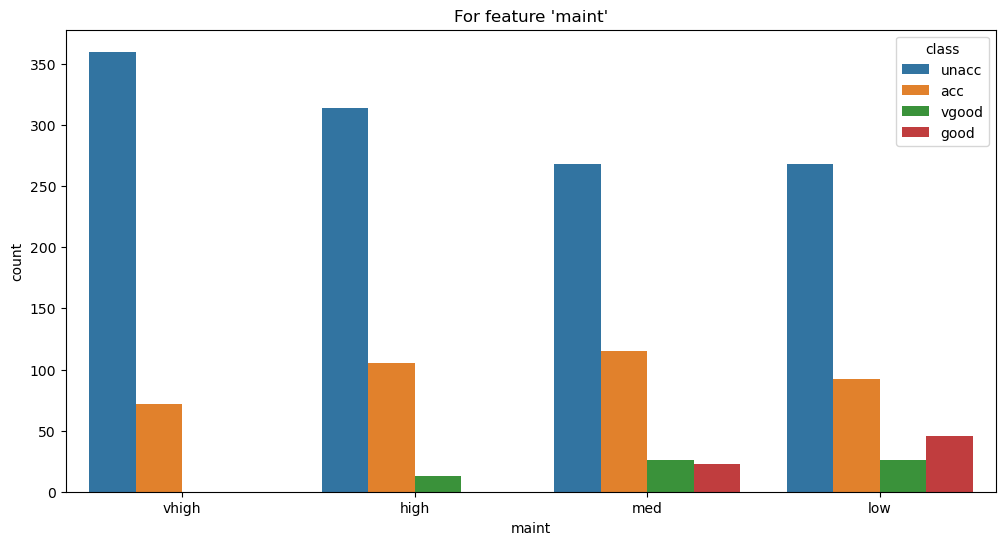

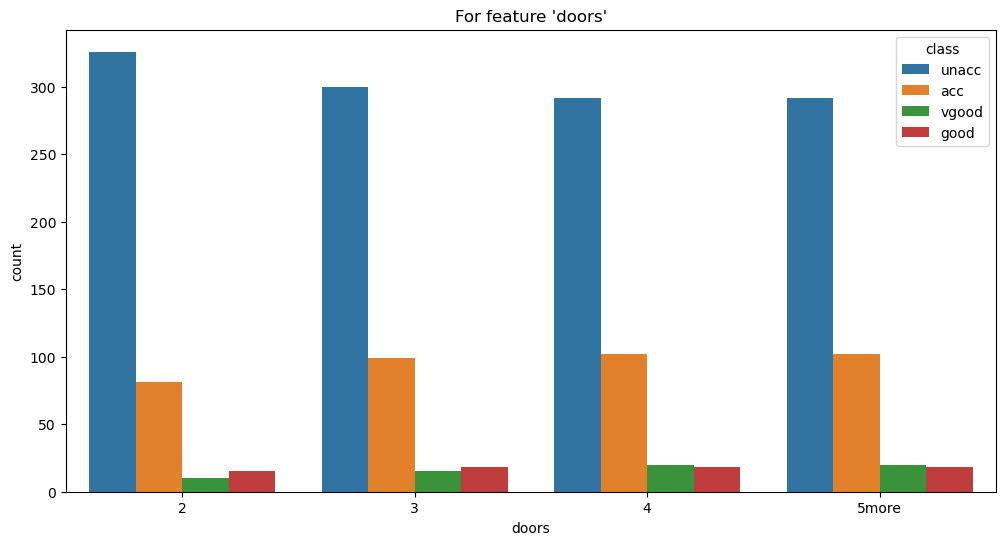

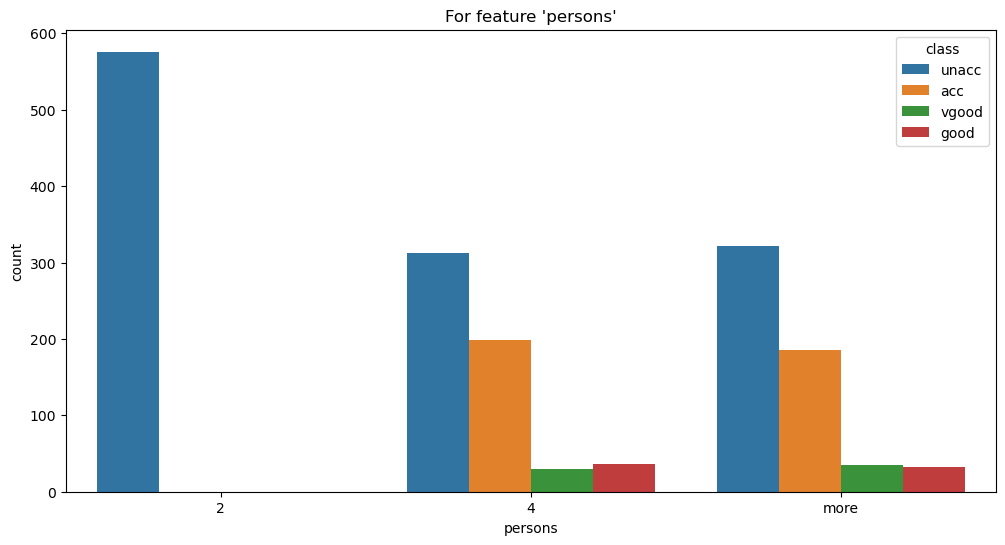

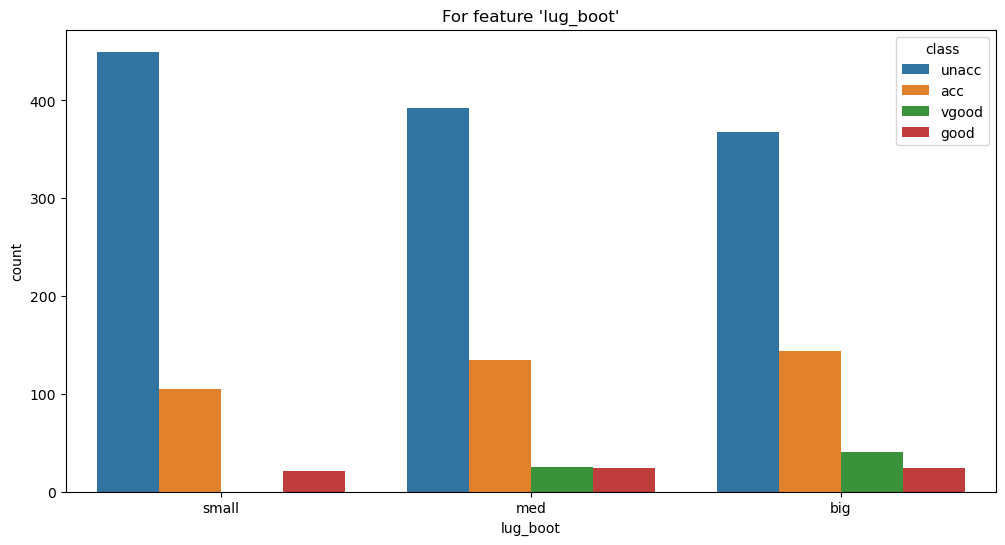

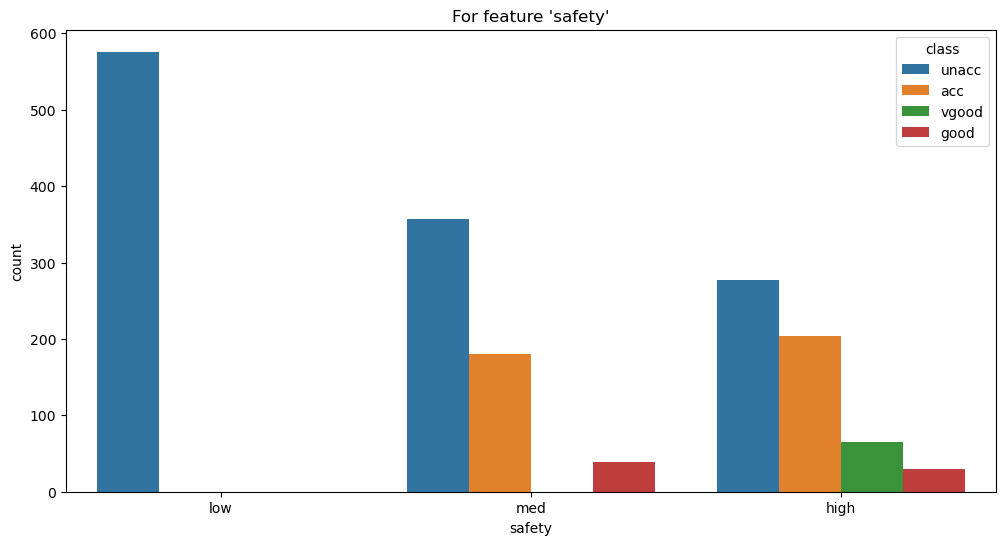

In [8]:
for i in auto.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(data=auto, x=i, hue='class')
    plt.show()

# Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()

In [11]:
for i in auto.columns:
    auto[i]=le.fit_transform(auto[i])

In [12]:
auto

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [13]:
auto=pd.read_excel(r'car_data1.xlsx')

data_new = auto.drop(['class'],axis=1)

data_new

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [14]:
data_with_dummies = pd.get_dummies(data_new, drop_first=True)

In [15]:
data_with_dummies

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0
1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
4,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1
1724,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0
1725,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
1726,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1


In [16]:
auto['class']=le.fit_transform(auto['class'])

In [17]:
targets = auto['class']

inputs = data_with_dummies[data_with_dummies.columns]

In [18]:
targets

0       2
1       2
2       2
3       2
4       2
       ..
1723    1
1724    3
1725    2
1726    1
1727    3
Name: class, Length: 1728, dtype: int64

In [19]:
targets.value_counts()

2    1210
0     384
1      69
3      65
Name: class, dtype: int64

In [20]:
inputs

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0
1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
4,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1
1724,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0
1725,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
1726,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=42)

In [22]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
import seaborn as sns
sns.set()

In [23]:
def evaluate(model, X_test, y_test):
    
    y_pred_test = model.predict(X_test)

    accuracy_test = accuracy_score(y_test, y_pred_test)*100
    
    
    
    y_pred_train = model.predict(X_train)

    accuracy_train = accuracy_score(y_train, y_pred_train)*100

    print('Accuracy for test is', accuracy_test)
    print('Accuracy for train is', accuracy_train)

In [24]:
base_model = svm.SVC()
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Accuracy for test is 94.21965317919076
Accuracy for train is 98.09760132340777


In [57]:
from sklearn.model_selection import RandomizedSearchCV

kernel = ['poly', 'rbf', 'sigmoid']
# kernel trick

gamma = ['scale', 'auto'] 
#Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

#if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma
#if ‘auto’, uses 1 / n_features.

C = [1, 10, 100, 1e3, 1e4, 1e5, 1e6]
# Must be strictly positive.

#epsilon = [0.1 , 0.01, 0.001, 0.0001] # will not be used in classification models


# Create the random grid
random_grid = {'kernel': kernel,
               'gamma': gamma,
               'C': C}
print(random_grid)

{'kernel': ['poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto'], 'C': [1, 10, 100, 1000.0, 10000.0, 100000.0, 1000000.0]}


In [58]:
svc_random = RandomizedSearchCV(estimator = base_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=1, n_jobs = -1)
# Fit the random search model
svc_random.fit(X_train, y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


/Users/personal_mac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 42 is smaller than n_iter=100. Running 42 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [1, 10, 100, 1000.0, 10000.0,
                                              100000.0, 1000000.0],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['poly', 'rbf', 'sigmoid']},
                   verbose=1)

In [59]:
svc_random.best_params_

{'kernel': 'rbf', 'gamma': 'scale', 'C': 10}

In [60]:
optimized_model = svc_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, X_test, y_test)

Accuracy for test is 96.91714836223507
Accuracy for train is 100.0


In [26]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC

In [27]:
# Create an SVC model
svm_model = SVC()

# Create a OneVsOneClassifier with the SVC model
one_vs_one_model = OneVsOneClassifier(svm_model)

# Fit the model on the training data
one_vs_one_model.fit(X_train, y_train)

OneVsOneClassifier(estimator=SVC())

In [28]:
y_scores = one_vs_one_model.decision_function(X_test)

y_scores

array([[ 2.2239665 , -0.27508774,  3.28102403,  0.75682242],
       [ 2.08405703,  3.24373938,  0.87870693, -0.23770356],
       [ 2.24357149,  0.73910547,  3.28418758, -0.27678336],
       ...,
       [ 3.24879019, -0.22536368,  2.07377983,  0.82244959],
       [ 2.21867568,  1.14481185,  3.20253302, -0.26952239],
       [ 2.18004036,  3.22757591,  0.77935385, -0.19258606]])

In [31]:
# Convert the target variable to binary for each class
y_binary = np.zeros((len(y_test), len(np.unique(targets))))

for i, label in enumerate(np.unique(targets)):
    y_binary[:, i] = (y_test == label).astype(int)

In [32]:
y_binary

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [34]:
# Calculate the AUC for each class
auc_scores = []
for i in range(len(np.unique(targets))):
    auc = roc_auc_score(y_binary[:, i], y_scores[:, i])
    auc_scores.append(auc)


In [35]:
auc_scores

[0.9478211251532186,
 0.9766315789473684,
 0.9965300669697076,
 0.9965488215488215]

In [36]:
generalized_auc = np.mean(auc_scores)

generalized_auc

0.9793828981547791

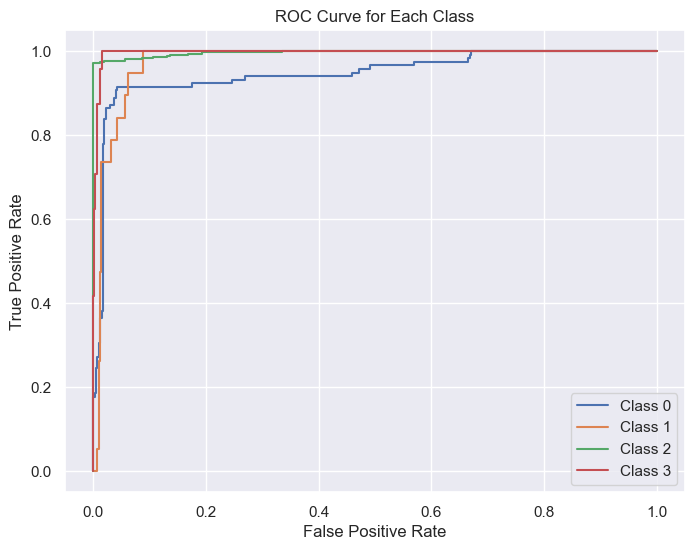

In [39]:
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(8, 6))
for i in range(len(np.unique(targets))):
    fpr, tpr, _ = roc_curve(y_binary[:, i], y_scores[:, i])
    plt.plot(fpr, tpr, label=f'Class {i}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend()
plt.show()

In [40]:
Gini = (generalized_auc * 2) - 1

Gini

0.9587657963095582